In [1]:
!pip install numpy pandas matplotlib seaborn netCDF4 xarray torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [2]:
!pip install tensorflow


In [4]:
!file small_synthetic_climatenet_dataset.csv


small_synthetic_climatenet_dataset.csv: Microsoft Excel 2007+


In [5]:
import pandas as pd

# If the uploaded name is still "small_synthetic_climatenet_dataset.csv" but it's Excel-format:
try:
    df = pd.read_excel("small_synthetic_climatenet_dataset.csv")
    print("Loaded as Excel successfully.")
except Exception as e:
    print("Excel read failed:", e)
    # If it truly is a misnamed .xlsx, try renaming in runtime:
    import os
    os.rename("small_synthetic_climatenet_dataset.csv", "small_synthetic_climatenet_dataset.xlsx")
    df = pd.read_excel("small_synthetic_climatenet_dataset.xlsx")
    print("Loaded after renaming to .xlsx.")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())
print(df.dtypes)


Loaded as Excel successfully.
Shape: (5120, 7)
Columns: ['lat', 'lon', 'time', 'PSL', 'Q850', 'UBOT', 'LABELS']


,lat,lon,time,PSL,Q850,UBOT,LABELS
0,-90.0,0.0,0,1015.375108,0.010503,4.389750,1
1,-90.0,0.0,1,1010.977091,0.008888,5.135180,0
2,-90.0,0.0,2,971.739654,0.008921,5.124643,0
3,-90.0,0.0,3,1011.793790,0.004286,7.363642,0
4,-90.0,0.0,4,978.822946,0.012405,1.954555,0


lat       float64
lon       float64
time        int64
PSL       float64
Q850      float64
UBOT      float64
LABELS      int64
dtype: object


In [6]:
# Inspect fully so we can decide inputs and target
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

# Assume df is already in memory from previous cell
print("=== Shape ===")
print(df.shape)
print("\n=== Columns ===")
print(df.columns.tolist())
print("\n=== Head ===")
display(df.head(10))
print("\n=== Data types ===")
print(df.dtypes)
print("\n=== Any missing counts ===")
print(df.isna().sum())


=== Shape ===
(5120, 7)

=== Columns ===
['lat', 'lon', 'time', 'PSL', 'Q850', 'UBOT', 'LABELS']

=== Head ===


,lat,lon,time,PSL,Q850,UBOT,LABELS
0,-90.0,0.000000,0,1015.375108,0.010503,4.389750,1
1,-90.0,0.000000,1,1010.977091,0.008888,5.135180,0
2,-90.0,0.000000,2,971.739654,0.008921,5.124643,0
3,-90.0,0.000000,3,1011.793790,0.004286,7.363642,0
4,-90.0,0.000000,4,978.822946,0.012405,1.954555,0
5,-90.0,11.612903,0,1002.631787,0.010243,4.554877,0
6,-90.0,11.612903,1,1008.210793,0.008340,5.633369,1
7,-90.0,11.612903,2,997.623076,0.014984,4.806996,0
8,-90.0,11.612903,3,996.776470,0.012620,5.320810,0
9,-90.0,11.612903,4,1025.116057,-0.002973,3.144658,2



=== Data types ===
lat       float64
lon       float64
time        int64
PSL       float64
Q850      float64
UBOT      float64
LABELS      int64
dtype: object

=== Any missing counts ===
lat       0
lon       0
time      0
PSL       0
Q850      0
UBOT      0
LABELS    0
dtype: int64


In [7]:
import numpy as np

# === ADJUST if your coordinate names are different ===
lat_col = [c for c in df.columns if "lat" in c.lower()]
lon_col = [c for c in df.columns if "lon" in c.lower() or "long" in c.lower()]

if not lat_col or not lon_col:
    raise ValueError("Could not find latitude/longitude columns. Please report the column names from df.columns.")

lat_col = lat_col[0]
lon_col = lon_col[0]

# Identify candidate input variable columns (exclude coords/time/label)
exclude = {lat_col, lon_col, 'time', 'Time', 'timestamp', 'label', 'Label'}
input_vars = [c for c in df.columns if c not in exclude]

print("Using spatial coords:", lat_col, lon_col)
print("Detected input variables (channels):", input_vars)

# Limit to first 3 channels for initial model (you can expand later)
channels = input_vars[:3]
print("Channels used:", channels)

# Function: build a (C,H,W) stack for one time slice or entire if no time
def make_sample(subdf, channels):
    grids = []
    for ch in channels:
        pivot = subdf.pivot(index=lat_col, columns=lon_col, values=ch)
        grid = pivot.values  # (H, W)
        grid = np.nan_to_num(grid)  # fill missing
        # normalize per-channel
        grid = (grid - grid.min()) / (grid.max() - grid.min() + 1e-8)
        grids.append(grid)
    x = np.stack(grids, axis=0)  # (C, H, W)
    return x

# Synthetic mask: threshold first channel to simulate an event region
def make_label(x_channel, threshold=0.6):
    return (x_channel > threshold).astype(np.float32)  # (H, W)

# Build dataset
samples_x = []
samples_y = []

if 'time' in df.columns or 'Time' in df.columns:
    time_col = 'time' if 'time' in df.columns else 'Time'
    for t in sorted(df[time_col].unique()):
        slice_df = df[df[time_col] == t]
        x = make_sample(slice_df, channels)
        y = make_label(x[0])  # use first channel threshold
        samples_x.append(x)
        samples_y.append(y)
else:
    x = make_sample(df, channels)
    y = make_label(x[0])
    samples_x.append(x)
    samples_y.append(y)

# Stack into arrays
X = np.stack(samples_x, axis=0).astype(np.float32)  # (N, C, H, W)
Y = np.stack([y[np.newaxis, ...] for y in samples_y], axis=0).astype(np.float32)  # (N,1,H,W)

print("Prepared array shapes:", "X", X.shape, "Y", Y.shape)


Using spatial coords: lat lon
Detected input variables (channels): ['PSL', 'Q850', 'UBOT', 'LABELS']
Channels used: ['PSL', 'Q850', 'UBOT']
Prepared array shapes: X (5, 3, 32, 32) Y (5, 1, 32, 32)


In [8]:
import torch
import torch.nn as nn

class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )
    def forward(self, x):
        return self.net(x)

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels=1):
        super().__init__()
        self.down1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.down2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.bottleneck = DoubleConv(128, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv_up2 = DoubleConv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv_up1 = DoubleConv(128, 64)
        self.final = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        d1 = self.down1(x)
        p1 = self.pool1(d1)
        d2 = self.down2(p1)
        p2 = self.pool2(d2)
        bn = self.bottleneck(p2)
        up2 = self.up2(bn)
        cat2 = torch.cat([up2, d2], dim=1)
        cu2 = self.conv_up2(cat2)
        up1 = self.up1(cu2)
        cat1 = torch.cat([up1, d1], dim=1)
        cu1 = self.conv_up1(cat1)
        return self.final(cu1)


In [9]:
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

# Dataset wrapper
class ClimateDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = torch.tensor(inputs)  # float32
        self.targets = torch.tensor(targets)

    def __len__(self):
        return self.inputs.shape[0]

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

# Prepare
dataset = ClimateDataset(X, Y)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(in_channels=X.shape[1], out_channels=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training
epochs = 8
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)
        loss = criterion(output, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg = running_loss / len(loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg:.4f}")


Epoch 1/8 - Loss: 0.6558
Epoch 2/8 - Loss: 0.4461
Epoch 3/8 - Loss: 0.3521
Epoch 4/8 - Loss: 0.2923
Epoch 5/8 - Loss: 0.2784
Epoch 6/8 - Loss: 0.2248
Epoch 7/8 - Loss: 0.2061
Epoch 8/8 - Loss: 0.1756


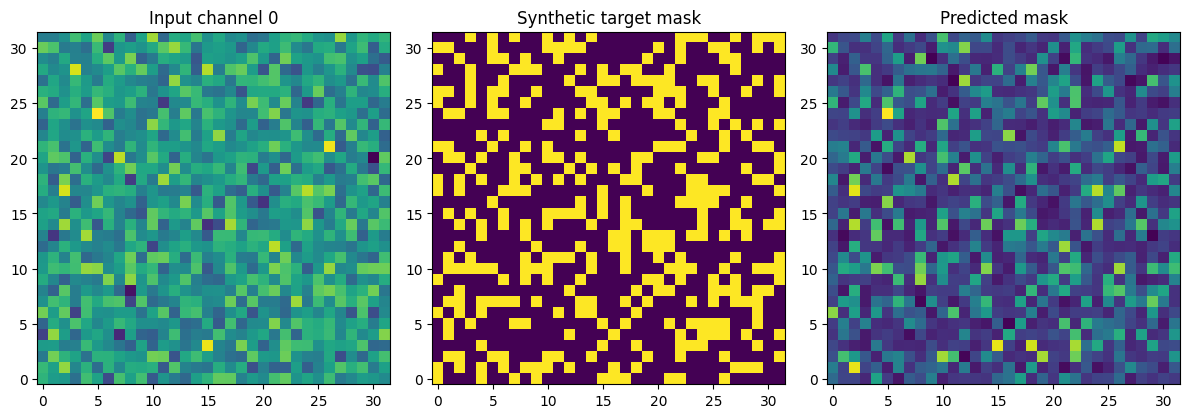

In [10]:
import torch
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    sample_x, sample_y = dataset[0]  # first sample
    inp = sample_x.unsqueeze(0).to(device)
    out = model(inp)
    prob = torch.sigmoid(out).cpu().squeeze().numpy()   # predicted mask probabilities
    target = sample_y.squeeze().numpy()                # synthetic ground truth
    channel0 = sample_x[0].numpy()                     # first input channel

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.title("Input channel 0")
    plt.imshow(channel0, origin='lower')
    plt.subplot(1,3,2)
    plt.title("Synthetic target mask")
    plt.imshow(target, origin='lower')
    plt.subplot(1,3,3)
    plt.title("Predicted mask")
    plt.imshow(prob, origin='lower')
    plt.tight_layout()
    plt.show()


In [11]:
def iou_score(pred_mask, true_mask, threshold=0.5):
    pred_bin = (pred_mask >= threshold).astype(float)
    intersection = (pred_bin * true_mask).sum()
    union = pred_bin.sum() + true_mask.sum() - intersection
    if union == 0:
        return 1.0 if intersection == 0 else 0.0
    return intersection / union

# Evaluate on first sample
model.eval()
with torch.no_grad():
    sample_x, sample_y = dataset[0]
    inp = sample_x.unsqueeze(0).to(device)
    out = model(inp)
    prob = torch.sigmoid(out).cpu().squeeze().numpy()
    target = sample_y.squeeze().numpy()
    print("IoU:", iou_score(prob, target))


IoU: 0.4860335195530726


In [12]:
torch.save(model.state_dict(), "climatnet_unet.pth")
print("Model saved to climatnet_unet.pth")


Model saved to climatnet_unet.pth


In [13]:
# Re-create architecture then:
model = UNet(in_channels=X.shape[1], out_channels=1).to(device)
model.load_state_dict(torch.load("climatnet_unet.pth"))
model.eval()


UNet(
  (down1): DoubleConv(
    (net): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down2): DoubleConv(
    (net): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )


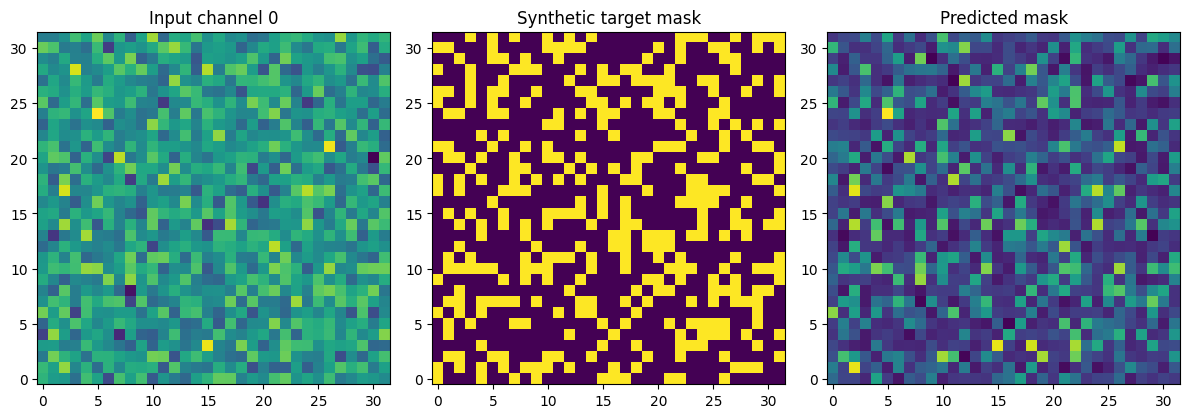

In [14]:
import torch
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    sample_x, sample_y = dataset[0]
    inp = sample_x.unsqueeze(0).to(device)
    out = model(inp)
    prob = torch.sigmoid(out).cpu().squeeze().numpy()
    target = sample_y.squeeze().numpy()
    channel0 = sample_x[0].numpy()

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.title("Input channel 0")
    plt.imshow(channel0, origin='lower')
    plt.subplot(1,3,2)
    plt.title("Synthetic target mask")
    plt.imshow(target, origin='lower')
    plt.subplot(1,3,3)
    plt.title("Predicted mask")
    plt.imshow(prob, origin='lower')
    plt.tight_layout()
    plt.show()


In [15]:
def iou_score(pred_mask, true_mask, threshold=0.5):
    pred_bin = (pred_mask >= threshold).astype(float)
    intersection = (pred_bin * true_mask).sum()
    union = pred_bin.sum() + true_mask.sum() - intersection
    if union == 0:
        return 1.0 if intersection == 0 else 0.0
    return intersection / union

model.eval()
with torch.no_grad():
    sample_x, sample_y = dataset[0]
    inp = sample_x.unsqueeze(0).to(device)
    out = model(inp)
    prob = torch.sigmoid(out).cpu().squeeze().numpy()
    target = sample_y.squeeze().numpy()
    print("IoU:", iou_score(prob, target))


IoU: 0.4860335195530726


In [16]:
from sklearn.model_selection import train_test_split
import torch

# X: (N,C,H,W), Y: (N,1,H,W)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

train_dataset = ClimateDataset(X_train, Y_train)
val_dataset = ClimateDataset(X_val, Y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=2)


In [17]:
best_val = float('inf')
for epoch in range(15):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}: train {train_loss:.4f}, val {val_loss:.4f}")
    if val_loss < best_val:
        best_val = val_loss
        torch.save(model.state_dict(), "best_climatnet_unet.pth")
        print("  Saved best model.")


Epoch 1: train 0.1609, val 0.3967
  Saved best model.
Epoch 2: train 0.1569, val 0.3672
  Saved best model.
Epoch 3: train 0.1569, val 0.3394
  Saved best model.
Epoch 4: train 0.1830, val 0.3119
  Saved best model.
Epoch 5: train 0.1609, val 0.2885
  Saved best model.
Epoch 6: train 0.1569, val 0.2673
  Saved best model.
Epoch 7: train 0.1609, val 0.2485
  Saved best model.
Epoch 8: train 0.1609, val 0.2321
  Saved best model.
Epoch 9: train 0.1609, val 0.2183
  Saved best model.
Epoch 10: train 0.1609, val 0.2067
  Saved best model.
Epoch 11: train 0.1830, val 0.1981
  Saved best model.
Epoch 12: train 0.1569, val 0.1910
  Saved best model.
Epoch 13: train 0.1609, val 0.1848
  Saved best model.
Epoch 14: train 0.1830, val 0.1813
  Saved best model.
Epoch 15: train 0.1830, val 0.1790
  Saved best model.


In [18]:
# Save final model (or best one loaded above)
torch.save(model.state_dict(), "climatnet_unet_final.pth")

# Example inference on all samples, save predictions
model.eval()
preds = []
with torch.no_grad():
    for i in range(X.shape[0]):
        inp = torch.tensor(X[i:i+1]).to(device)
        out = model(inp)
        prob = torch.sigmoid(out).cpu().squeeze().numpy()
        preds.append(prob)
import numpy as np
np.save("predicted_masks.npy", np.stack(preds))
print("Saved predictions and model.")


Saved predictions and model.


In [19]:
from google.colab import files
files.download("best_climatnet_unet.pth")
files.download("predicted_masks.npy")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Install docx if missing
!pip install --quiet python-docx openpyxl

import numpy as np
import pandas as pd
import torch
from sklearn.metrics import jaccard_score
from google.colab import files
import os

# Try importing Document (after install)
try:
    from docx import Document
    have_docx = True
except ImportError:
    print("Warning: python-docx still unavailable; skipping Word output.")
    have_docx = False

# Load predictions
preds = np.load("predicted_masks.npy")  # (N,H,W)

# Ensure required objects exist
if 'Y' not in globals():
    raise RuntimeError("Y (ground truth masks) not in memory. Rerun preprocessing.")
if 'df' not in globals():
    raise RuntimeError("Original dataframe df not in memory.")

# Identify coordinate columns
lat_col = [c for c in df.columns if "lat" in c.lower()]
lon_col = [c for c in df.columns if "lon" in c.lower() or "long" in c.lower()]

if not lat_col or not lon_col:
    raise RuntimeError("Could not find latitude/longitude columns in df.columns.")
lat_col = lat_col[0]
lon_col = lon_col[0]

# Time handling
has_time = 'time' in df.columns or 'Time' in df.columns
time_col = 'time' if 'time' in df.columns else ('Time' if 'Time' in df.columns else None)
times = sorted(df[time_col].unique()) if has_time else [None]

# Sorted unique coords
lat_vals = np.sort(df[lat_col].unique())
lon_vals = np.sort(df[lon_col].unique())

# Helpers
def compute_iou(pred_mask, true_mask, threshold=0.5):
    pred_bin = (pred_mask >= threshold).astype(int).flatten()
    true_bin = true_mask.flatten().astype(int)
    if true_bin.sum() == 0 and pred_bin.sum() == 0:
        return 1.0
    return jaccard_score(true_bin, pred_bin, zero_division=1)

all_rows = []
summary_rows = []

for idx in range(preds.shape[0]):
    pred = preds[idx]
    true = Y[idx, 0]
    t = times[idx] if has_time else None
    iou = compute_iou(pred, true)

    LAT, LON = np.meshgrid(lat_vals, lon_vals, indexing='ij')  # (H,W)

    flat = {
        lat_col: LAT.flatten(),
        lon_col: LON.flatten(),
        "predicted_probability": pred.flatten(),
        "synthetic_mask": true.flatten().astype(int),
        "predicted_mask_binary": (pred.flatten() >= 0.5).astype(int),
        "sample_index": [idx] * (LAT.size)
    }
    if has_time:
        flat[time_col] = [t] * (LAT.size)

    df_flat = pd.DataFrame(flat)
    all_rows.append(df_flat)

    summary_rows.append({
        "sample_index": idx,
        "time": t if has_time else "NA",
        "IoU": iou,
        "truth_positive": int(true.sum()),
        "pred_positive": int((pred >= 0.5).sum()),
    })

combined_df = pd.concat(all_rows, ignore_index=True)
summary_df = pd.DataFrame(summary_rows)

# Save outputs
combined_csv = "all_predictions_combined.csv"
summary_csv = "summary_metrics.csv"
combined_df.to_csv(combined_csv, index=False)
summary_df.to_csv(summary_csv, index=False)

with pd.ExcelWriter("predictions_and_summary.xlsx", engine="openpyxl") as writer:
    # put a sample of combined for size control
    combined_df.sample(n=min(1000, len(combined_df))).to_excel(writer, sheet_name="example_rows", index=False)
    summary_df.to_excel(writer, sheet_name="summary", index=False)

# Word summary if available
docx_name = "prediction_summary.docx"
if have_docx:
    doc = Document()
    doc.add_heading("ClimateNet-style Prediction Summary", 0)
    doc.add_paragraph("Summary of model predictions vs synthetic ground truth.")
    doc.add_paragraph(f"Total samples: {preds.shape[0]}")
    table = doc.add_table(rows=1, cols=5)
    hdr = table.rows[0].cells
    hdr[0].text = "Sample Index"
    hdr[1].text = "Time"
    hdr[2].text = "IoU"
    hdr[3].text = "Truth Positive Pixels"
    hdr[4].text = "Predicted Positive Pixels"
    for r in summary_rows:
        row_cells = table.add_row().cells
        row_cells[0].text = str(r["sample_index"])
        row_cells[1].text = str(r["time"])
        row_cells[2].text = f"{r['IoU']:.4f}"
        row_cells[3].text = str(r["truth_positive"])
        row_cells[4].text = str(r["pred_positive"])
    doc.save(docx_name)
else:
    docx_name = None

# Package
zip_name = "outputs_bundle.zip"
to_zip = [combined_csv, summary_csv, "predictions_and_summary.xlsx"]
if docx_name:
    to_zip.append(docx_name)
!zip -r {zip_name} {' '.join(to_zip)}

# Download all
files.download(combined_csv)
files.download(summary_csv)
files.download("predictions_and_summary.xlsx")
if docx_name:
    files.download(docx_name)
files.download(zip_name)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.2 MB/s eta 0:00:00
  adding: all_predictions_combined.csv (deflated 84%)
  adding: summary_metrics.csv (deflated 28%)
  adding: predictions_and_summary.xlsx (deflated 7%)
  adding: prediction_summary.docx (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Ensure dependencies
!pip install --quiet python-docx matplotlib

import numpy as np
import torch
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches
from sklearn.metrics import jaccard_score
import os
from google.colab import files

# Load predictions if not already loaded
preds = np.load("predicted_masks.npy")  # shape (N, H, W)

# Validate required objects
assert 'Y' in globals(), "Y (ground truth) missing; rerun preprocessing."
assert 'df' in globals(), "df (original DataFrame) missing."

# Helper: IoU
def iou_score(pred_mask, true_mask, threshold=0.5):
    pred_bin = (pred_mask >= threshold).astype(int).flatten()
    true_bin = true_mask.flatten().astype(int)
    if true_bin.sum() == 0 and pred_bin.sum() == 0:
        return 1.0
    return jaccard_score(true_bin, pred_bin, zero_division=1)

# Prepare doc
doc = Document()
doc.add_heading("ClimateNet-style Prediction Report", 0)
doc.add_paragraph("Each sample shows: input channel 0, synthetic mask, predicted mask, and IoU.")

# Time info if exists
has_time = 'time' in df.columns or 'Time' in df.columns
time_col = 'time' if 'time' in df.columns else ('Time' if 'Time' in df.columns else None)
times = sorted(df[time_col].unique()) if has_time else [None]

# Ensure output dir for temp images
os.makedirs("report_images", exist_ok=True)

for idx in range(preds.shape[0]):
    pred = preds[idx]  # (H,W)
    true = Y[idx, 0]   # (H,W)
    # Input first channel
    sample_x = X[idx]  # (C,H,W)
    channel0 = sample_x[0]  # (H,W)

    iou = iou_score(pred, true)

    # Make plot
    fig, axes = plt.subplots(1, 3, figsize=(9,3))
    axes[0].imshow(channel0, origin='lower')
    axes[0].set_title("Input ch0")
    axes[0].axis("off")
    axes[1].imshow(true, origin='lower')
    axes[1].set_title("Synthetic mask")
    axes[1].axis("off")
    axes[2].imshow(pred, origin='lower')
    axes[2].set_title("Predicted mask")
    axes[2].axis("off")
    plt.tight_layout()

    img_path = f"report_images/sample_{idx}.png"
    fig.savefig(img_path, dpi=150)
    plt.close(fig)

    # Add section to doc
    doc.add_heading(f"Sample {idx}", level=1)
    if has_time:
        doc.add_paragraph(f"Time: {times[idx]}")
    doc.add_paragraph(f"IoU: {iou:.4f}")
    doc.add_picture(img_path, width=Inches(5))  # adjust size if needed
    doc.add_paragraph("")  # spacer

# Save document
report_name = "climatnet_prediction_report.docx"
doc.save(report_name)
print(f"Generated report: {report_name}")

# Package images too (optional)
!zip -r report_bundle.zip {report_name} report_images
files.download(report_bundle.zip)
files.download(report_name)


Generated report: climatnet_prediction_report.docx
  adding: climatnet_prediction_report.docx (deflated 2%)
  adding: report_images/ (stored 0%)
  adding: report_images/sample_1.png (deflated 20%)
  adding: report_images/sample_0.png (deflated 20%)
  adding: report_images/sample_3.png (deflated 21%)
  adding: report_images/sample_2.png (deflated 20%)
  adding: report_images/sample_4.png (deflated 20%)


NameError: name 'report_bundle' is not defined

In [24]:
# Download generated files
from google.colab import files
files.download("report_bundle.zip")
files.download("climatnet_prediction_report.docx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from google.colab import files

# Confirm the files exist
!ls -l report_bundle.zip climatnet_prediction_report.docx

# Download by filename string
files.download("report_bundle.zip")
files.download("climatnet_prediction_report.docx")


-rw-r--r-- 1 root root 140728 Aug  5 04:07 climatnet_prediction_report.docx
-rw-r--r-- 1 root root 242120 Aug  5 04:07 report_bundle.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>